In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/AmesHousing.csv")

In [3]:
pd.set_option('display.max_rows', None)

Examine the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Check the correlation between features and sale price

In [6]:
corr = df.select_dtypes(include=['number']).corr()['SalePrice'].sort_values(ascending=True)
non_corr = corr[corr.abs()<0.1] #Define columns that are correlated less than abs(0.1) as non correlated
print(non_corr)

MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Order             -0.031408
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Name: SalePrice, dtype: float64


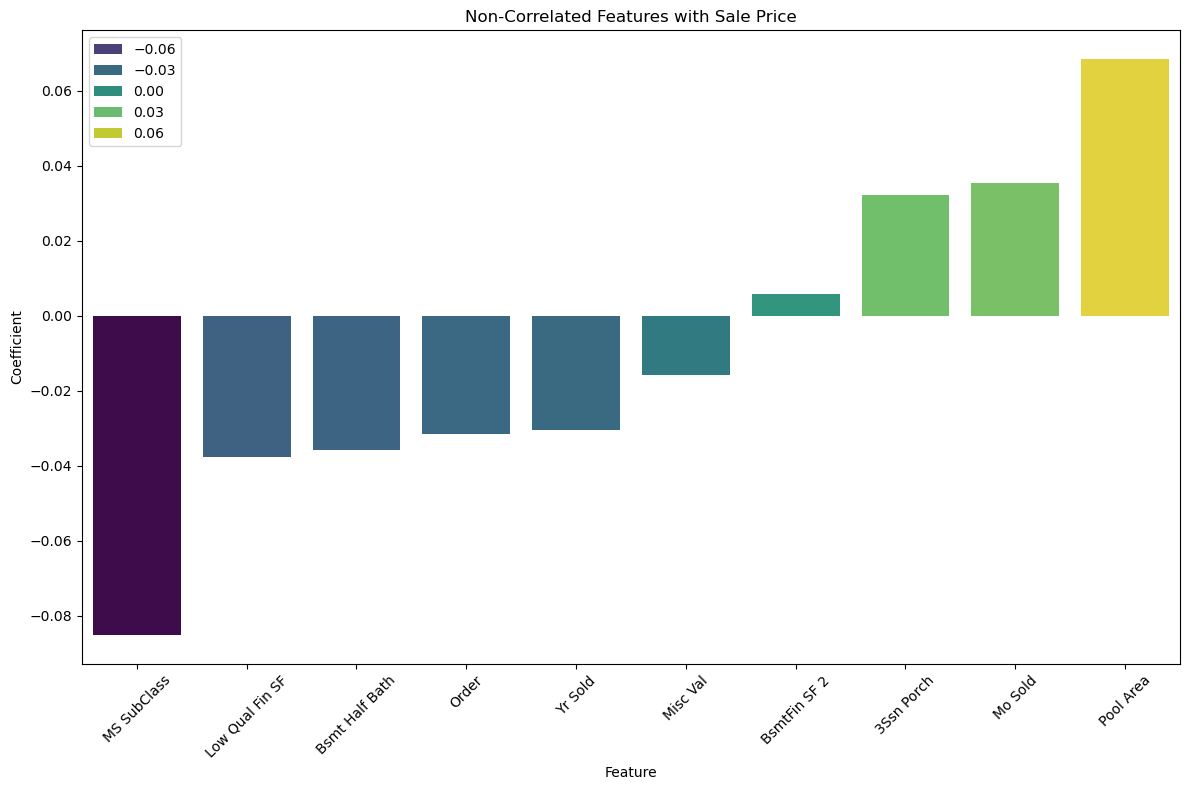

In [7]:
plt.figure(figsize=(12,8))
sns.barplot(x=non_corr.index,y=non_corr.values,palette="viridis",hue=non_corr.values)
plt.title("Non-Correlated Features with Sale Price")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Identify the NaN Ratio of columns and pick the highest 5

In [8]:
nan_values = df.isnull().mean().sort_values(ascending=False).reset_index()
nan_values.columns = ['Feature', 'NaN_Ratio']
high_nans = nan_values[nan_values["NaN_Ratio"]>0.3] #Pick the columns which have more than 0.3 NaN ratio
print(nan_values)
print(high_nans)


            Feature  NaN_Ratio
0           Pool QC   0.995563
1      Misc Feature   0.963823
2             Alley   0.932423
3             Fence   0.804778
4      Mas Vnr Type   0.605802
5      Fireplace Qu   0.485324
6      Lot Frontage   0.167235
7       Garage Cond   0.054266
8     Garage Finish   0.054266
9     Garage Yr Blt   0.054266
10      Garage Qual   0.054266
11      Garage Type   0.053584
12    Bsmt Exposure   0.028328
13   BsmtFin Type 2   0.027645
14        Bsmt Qual   0.027304
15        Bsmt Cond   0.027304
16   BsmtFin Type 1   0.027304
17     Mas Vnr Area   0.007850
18   Bsmt Full Bath   0.000683
19   Bsmt Half Bath   0.000683
20     BsmtFin SF 1   0.000341
21      Garage Cars   0.000341
22       Electrical   0.000341
23    Total Bsmt SF   0.000341
24      Bsmt Unf SF   0.000341
25     BsmtFin SF 2   0.000341
26      Garage Area   0.000341
27      Paved Drive   0.000000
28        Full Bath   0.000000
29        Half Bath   0.000000
30    Bedroom AbvGr   0.000000
31    Ki

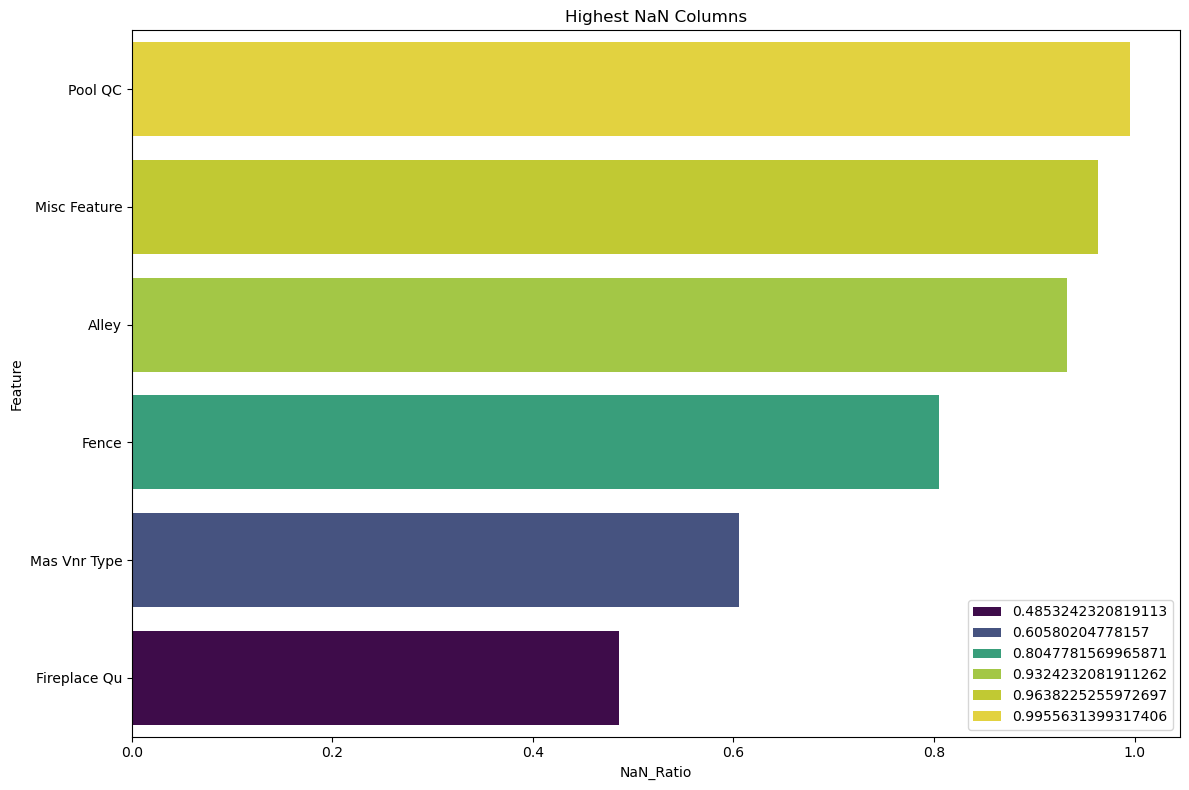

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(data=high_nans,x="NaN_Ratio",y="Feature",palette="viridis",hue=high_nans["NaN_Ratio"])
plt.title("Highest NaN Columns")
plt.tight_layout()
plt.legend()
plt.show()

In [10]:
print("High NaN's content :") #Look their content
for i in range(len(high_nans["Feature"])):
    print(f" {high_nans["Feature"][i]} : {df[high_nans["Feature"][i]].unique()}") 

High NaN's content :
 Pool QC : [nan 'Ex' 'Gd' 'TA' 'Fa']
 Misc Feature : [nan 'Gar2' 'Shed' 'Othr' 'Elev' 'TenC']
 Alley : [nan 'Pave' 'Grvl']
 Fence : [nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
 Mas Vnr Type : ['Stone' nan 'BrkFace' 'BrkCmn' 'CBlock']
 Fireplace Qu : ['Gd' nan 'TA' 'Po' 'Ex' 'Fa']


Now, here I make detailed analysis to distinguish between logical NaN and incomplete information NaN.

In [11]:
def check_logical_nan(df, main_col, support_col):
    mask = df[main_col].isnull() | (df[main_col] == "None")
    return df[mask & (df[support_col] > 0)][[main_col, support_col]]


In [12]:
check_logical_nan(df,"Pool QC","Pool Area") #No output means there is no None value of Pool QC while Pool Area is > 0

,Pool QC,Pool Area


In [13]:
check_logical_nan(df,"Mas Vnr Type","Mas Vnr Area") #If type is None and area is not close to 0 , it means the value is missing or entered incorrectly.

,Mas Vnr Type,Mas Vnr Area
363,NaN,344.0
403,NaN,312.0
441,NaN,285.0
1861,NaN,1.0
1913,NaN,1.0
2003,NaN,1.0
2528,NaN,288.0


In [14]:
mask = (df["Mas Vnr Type"]=="None") & (df["Mas Vnr Area"]>10)

In [15]:
mode = df.loc[df["Mas Vnr Type"]!= "None" , "Mas Vnr Type"].mode()[0]

In [16]:
df.loc[mask,"Mas Vnr Type"] = mode

In [17]:
check_logical_nan(df,"Mas Vnr Type","Mas Vnr Area")

,Mas Vnr Type,Mas Vnr Area
363,NaN,344.0
403,NaN,312.0
441,NaN,285.0
1861,NaN,1.0
1913,NaN,1.0
2003,NaN,1.0
2528,NaN,288.0


In [18]:
check_logical_nan(df,"Fireplace Qu","Fireplaces")

,Fireplace Qu,Fireplaces


In [19]:
cols_with_logical_none = ["Pool QC", "Misc Feature", "Alley", "Fence", "Mas Vnr Type", "Fireplace Qu","Bsmt Qual","Bsmt Cond"]

for col in cols_with_logical_none:
    df[col] = df[col].fillna("None")


I process suspicious columns by examining how many different values each property has.

In [20]:
unique_num_df = df.nunique().sort_values().reset_index()
unique_num_df.columns = ["Feature","Unique"]
print(unique_num_df)


            Feature  Unique
0       Central Air       2
1            Street       2
2         Utilities       3
3    Bsmt Half Bath       3
4     Garage Finish       3
5        Land Slope       3
6             Alley       3
7         Half Bath       3
8       Paved Drive       3
9         Lot Shape       4
10     Land Contour       4
11    Kitchen AbvGr       4
12   Bsmt Full Bath       4
13       Exter Qual       4
14    Bsmt Exposure       4
15       Electrical       5
16       Exter Cond       5
17       Heating QC       5
18     Mas Vnr Type       5
19            Fence       5
20        Full Bath       5
21          Pool QC       5
22       Fireplaces       5
23       Lot Config       5
24          Yr Sold       5
25      Garage Qual       5
26      Garage Cond       5
27     Kitchen Qual       5
28        Bldg Type       5
29   Sale Condition       6
30     Fireplace Qu       6
31     Misc Feature       6
32      Garage Type       6
33      Garage Cars       6
34          Heating 

In [21]:
less_unique=unique_num_df[unique_num_df["Unique"]<5] #If it has very few different features, information may have been entered incompletely.
for i in range(len(less_unique)):                    #or, too many different features may indicate unnecessary information such as id.

    print(f"{less_unique["Feature"][i]}")


Central Air
Street
Utilities
Bsmt Half Bath
Garage Finish
Land Slope
Alley
Half Bath
Paved Drive
Lot Shape
Land Contour
Kitchen AbvGr
Bsmt Full Bath
Exter Qual
Bsmt Exposure


Feature Engineering Part


In [22]:
df["TotalPorchSF"] = (
    df["Wood Deck SF"]
    + df["Open Porch SF"]
    + df["Enclosed Porch"]
    + df["3Ssn Porch"]
    + df["Screen Porch"]
)


In [23]:
df[["TotalPorchSF", "SalePrice"]].corr()


,TotalPorchSF,SalePrice
TotalPorchSF,1.000000,0.383506
SalePrice,0.383506,1.000000


In [24]:
df["HouseAge"]=df["Yr Sold"]-df["Year Built"]
df["RemodAge"]=df["Yr Sold"]-df["Year Remod/Add"]

In [25]:
df[["HouseAge","SalePrice"]].corr()


,HouseAge,SalePrice
HouseAge,1.000000,-0.558907
SalePrice,-0.558907,1.000000


In [26]:
df[["RemodAge","SalePrice"]].corr()

,RemodAge,SalePrice
RemodAge,1.00000,-0.53494
SalePrice,-0.53494,1.00000


In [27]:
df["Total Bath"]=df["Bsmt Full Bath"]+df["Bsmt Half Bath"]+df["Full Bath"]+df["Half Bath"]

In [28]:
df["TotalBsmtFinSF"] = df["BsmtFin SF 1"] + df["BsmtFin SF 2"]


In [29]:
df["TotalSF"] = df["Total Bsmt SF"]+df["1st Flr SF"]+df["2nd Flr SF"]

In [30]:
df["LowQualRatio"] = df["Low Qual Fin SF"] / (df["TotalSF"] + df["Low Qual Fin SF"] + 1)


In [31]:
df["HasPool"] = (df["Pool Area"] > 0).astype(int)


In [32]:
drop_cols = ["PID","Order","Street","Low Qual Fin SF","Misc Val","BsmtFin SF 2","Wood Deck SF", "Open Porch SF", "Enclosed Porch", 
             "3Ssn Porch", "Screen Porch","Year Built","Year Remod/Add","Total Bsmt SF","1st Flr SF","2nd Flr SF","Bsmt Full Bath","Bsmt Half Bath"
            "Full Bath","Half Bath","BsmtFin SF 1","BsmtFin SF 2","LowQualFinSF","Pool Area"]

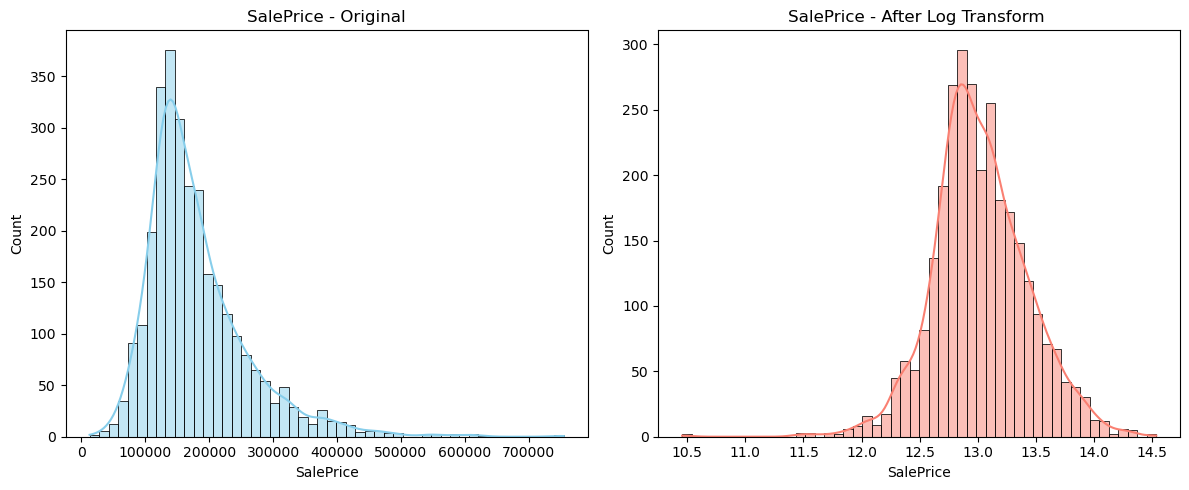

In [33]:
# 1. Original distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["SalePrice"], kde=True, bins=50, color="skyblue")
plt.title("SalePrice - Original")

# 2. After log transform
plt.subplot(1,2,2)
sns.histplot(np.log(df["SalePrice"])+1, kde=True, bins=50, color="salmon")
plt.title("SalePrice - After Log Transform ")

plt.tight_layout()
plt.show()


A basic model arc. to test what has been done


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

In [35]:
df_model = df.copy()

cols_to_drop = [c for c in drop_cols if c in df_model.columns]
df_model = df_model.drop(columns=cols_to_drop, errors="ignore")

print(f"Data shape after dropping columns: {df_model.shape}")

Data shape after dropping columns: (2930, 70)


In [36]:
# Fill remaining numerical NaN values with median and categorical NaN values with the mode 
for col in df_model.columns:
    if df_model[col].dtype in ["int64", "float64"]:
        df_model[col] = df_model[col].fillna(df_model[col].median())
    else:
        df_model[col] = df_model[col].fillna(df_model[col].mode()[0])

# Convert categorical variables into dummy/indicator variables (One-Hot Encoding)
df_encoded = pd.get_dummies(df_model, drop_first=True)

print(f"Shape after One-Hot Encoding: {df_encoded.shape}")

Shape after One-Hot Encoding: (2930, 259)


In [37]:
X = df_encoded.drop("SalePrice", axis=1)

# Apply log transformation to the target variable 
y = np.log1p(df_encoded["SalePrice"])

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test split completed.")

Train-Test split completed.


In [38]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit on training set only to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaling completed.")

Data scaling completed.


In [39]:
print("--- Starting Ridge Regression Benchmark ---")

# RidgeCV automatically performs Cross-Validation to find the best alpha
ridge_alphas = [0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0]
ridge_model = RidgeCV(alphas=ridge_alphas, cv=5)

# Fit the model
ridge_model.fit(X_train_scaled, y_train)

# Predict and evaluate 
y_pred_ridge = ridge_model.predict(X_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Best Ridge Alpha: {ridge_model.alpha_}")
print(f"Ridge RMSE (Log Scale): {rmse_ridge:.4f}")

--- Starting Ridge Regression Benchmark ---
Best Ridge Alpha: 100.0
Ridge RMSE (Log Scale): 0.1285
